<a href="https://colab.research.google.com/github/aaguil8a/project-2-ML/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [406]:

%matplotlib inline
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import io
import urllib.request as req
import zipfile
import pandas as pd 
import numpy as np
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor 

import warnings
warnings.filterwarnings('ignore')

# Part 1

## Dataset: 

**src:** https://www.kaggle.com/janiobachmann/math-students

**Description:** This is a dataset from the UCI datasets repository. This dataset contains the final scores of students at the end of a math programs with several features that might or might not impact the future outcome of these students.

**Target:** G3 (final grade numeric: from 0 to 20)

**Type:** Regression


# Features:


Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [407]:
filename = 'https://raw.githubusercontent.com/aaguil8a/DS/main/student-mat.csv'

df = pd.read_csv(filename)

In [408]:
df.shape

(395, 33)

# Part 2

## Cleaning & Exploring

### Cleaning 

In [409]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [410]:
df.duplicated().any() # No duplicates

False

In [411]:
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

# There are no missing values

Series([], dtype: float64)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [413]:
for c in df.columns:
  print(f"Column: {c}\n")
  print(df[c].value_counts())
  print("---\n")

Column: school

GP    349
MS     46
Name: school, dtype: int64
---

Column: sex

F    208
M    187
Name: sex, dtype: int64
---

Column: age

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
---

Column: address

U    307
R     88
Name: address, dtype: int64
---

Column: famsize

GT3    281
LE3    114
Name: famsize, dtype: int64
---

Column: Pstatus

T    354
A     41
Name: Pstatus, dtype: int64
---

Column: Medu

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
---

Column: Fedu

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
---

Column: Mjob

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
---

Column: Fjob

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
---

Column: reason

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
-

 ### Exploring 

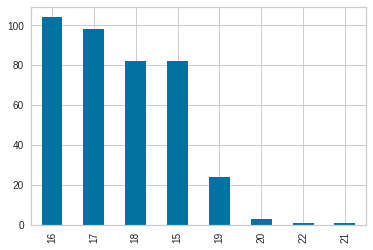

In [414]:
df.age.value_counts().plot(kind='bar') 
# We can see here there is right tail distribution: there is mostly teens that take part in this program. 


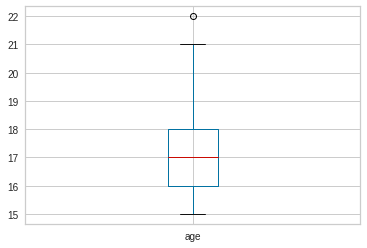

In [415]:
df.age.plot.box() # Here we see the outliers.

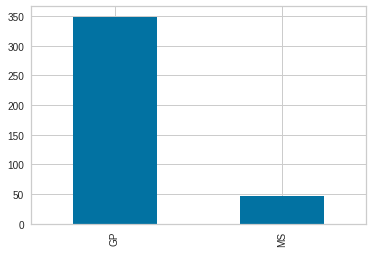

In [416]:
df.school.value_counts().plot(kind='bar') # For school we see that most GP school takes in the math program.

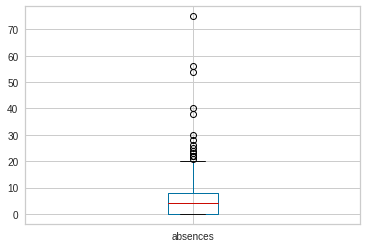

In [417]:
df.absences.plot.box() # Most of the outliers are absences that are more than 20. 

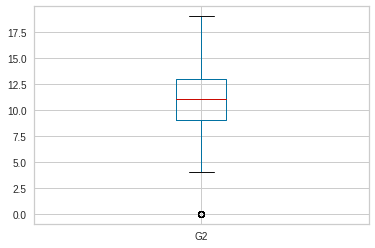

In [418]:
df.G2.plot.box() # We see that one student did the worse.

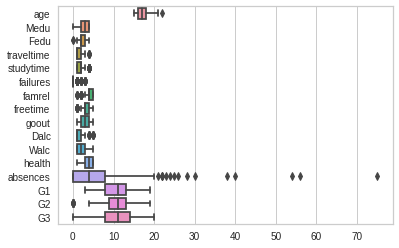

In [419]:
sns.boxplot(data=df,orient = "h"); # Here we can see that absences has most outliers.

### Categorical Data

In [420]:
categorical_cols = df.columns[df.dtypes == object].tolist()

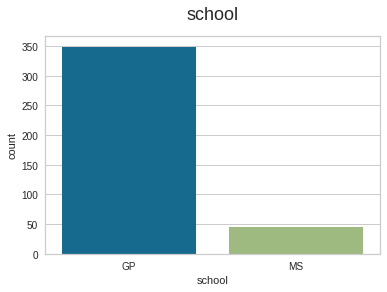

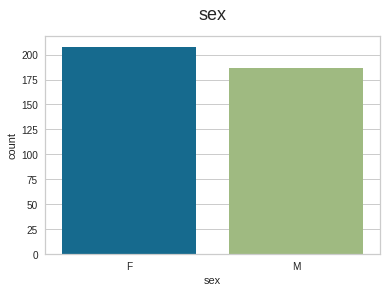

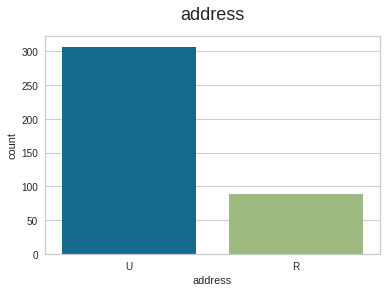

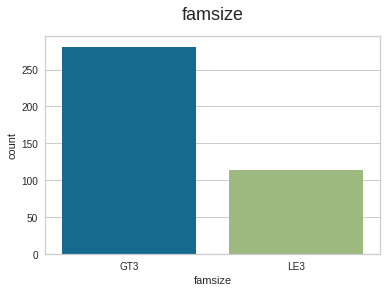

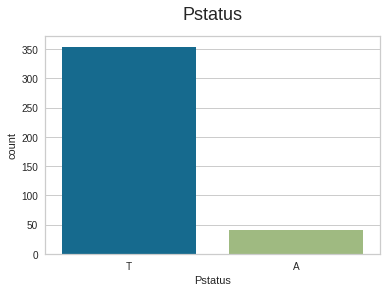

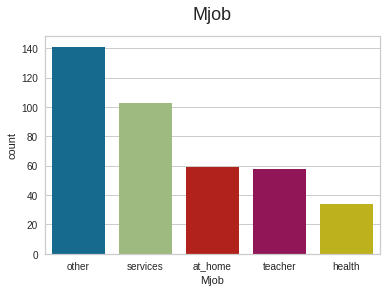

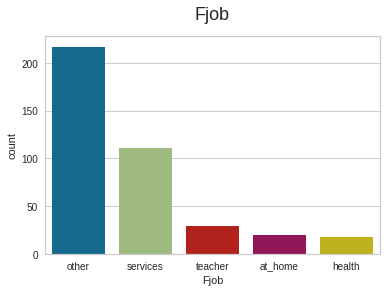

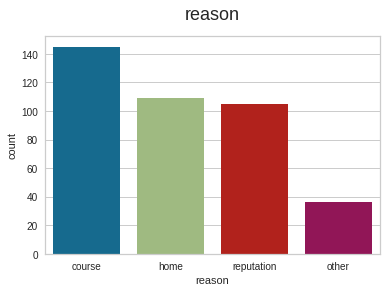

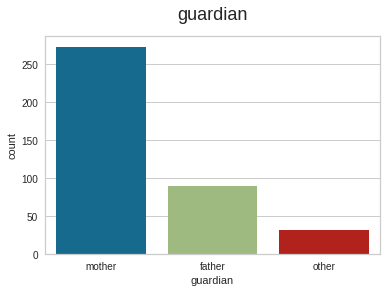

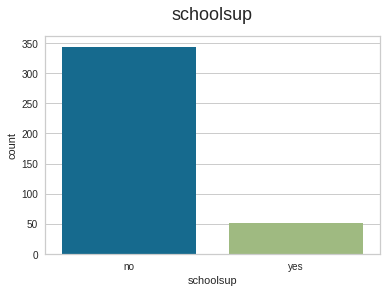

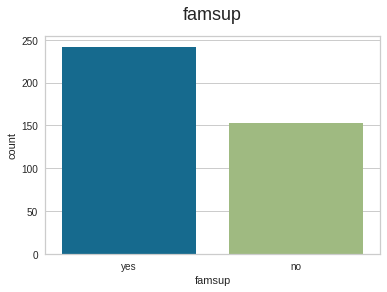

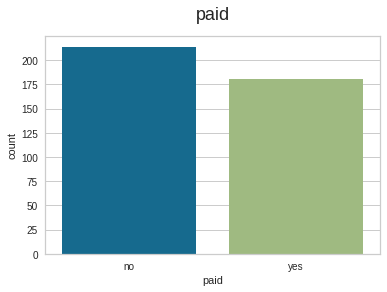

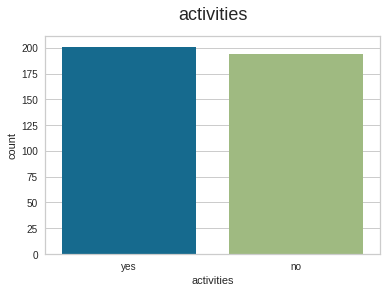

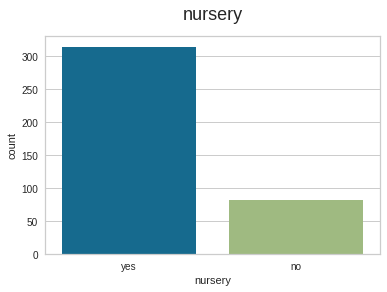

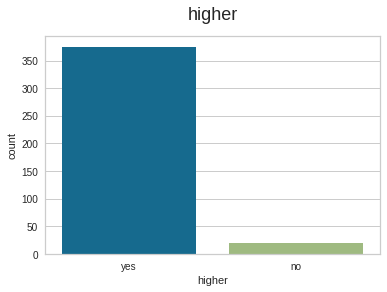

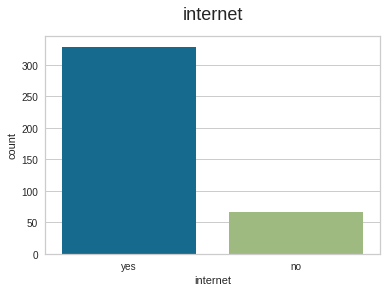

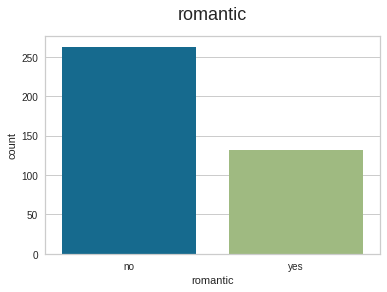

In [421]:
for c in categorical_cols:
  plt.title(" ".join(c.split("_")),size=18,y=1.05)
  sns.countplot(df[c],order=df[c].value_counts().index)
  plt.show()

 # Numeric Data

In [422]:
numerical_cols = df.columns[df.dtypes == 'int64'].tolist()

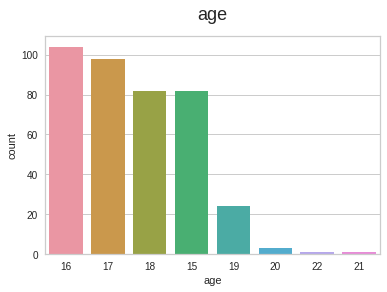

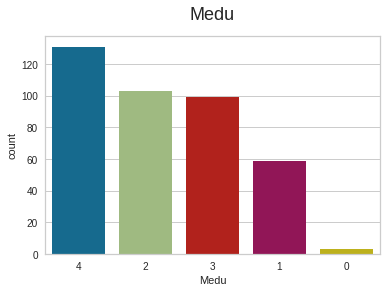

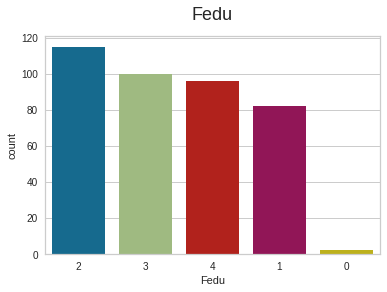

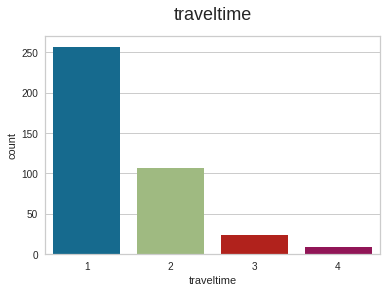

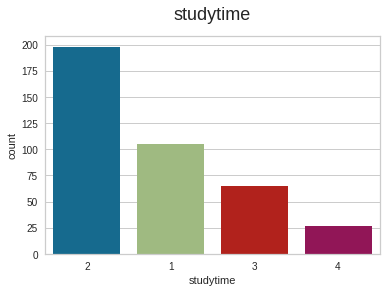

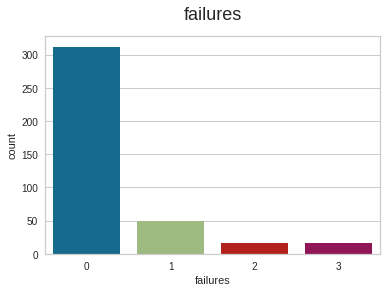

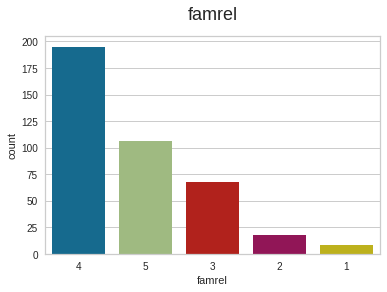

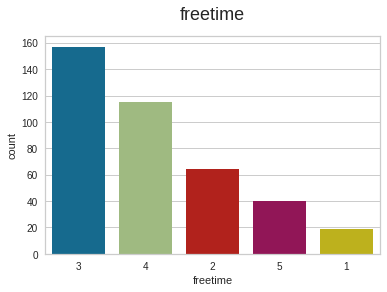

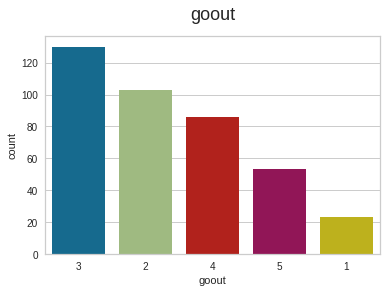

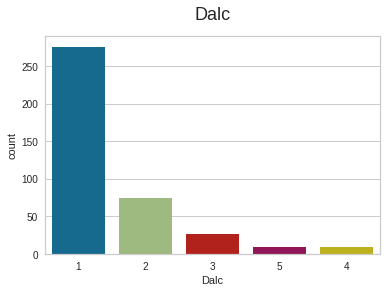

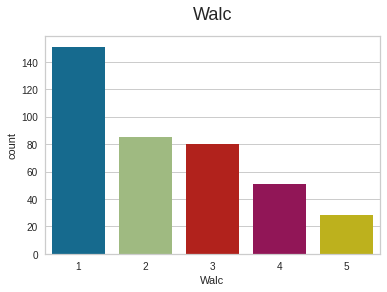

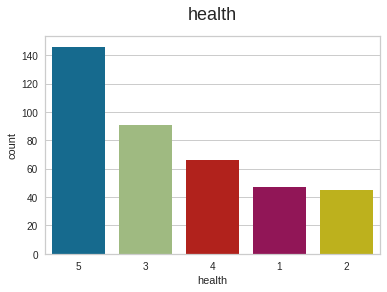

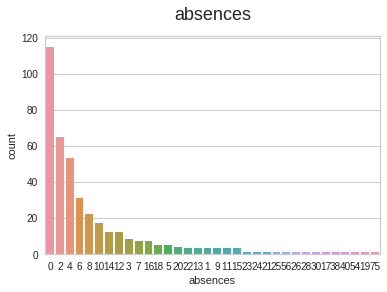

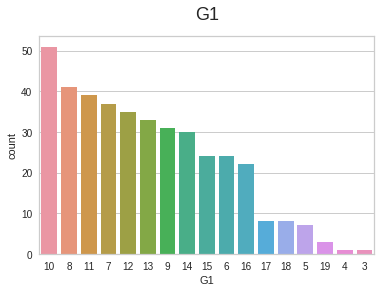

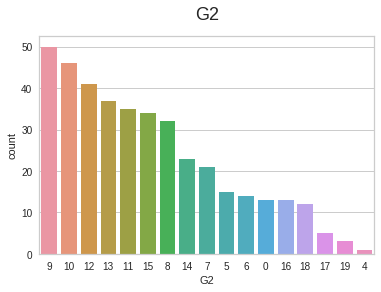

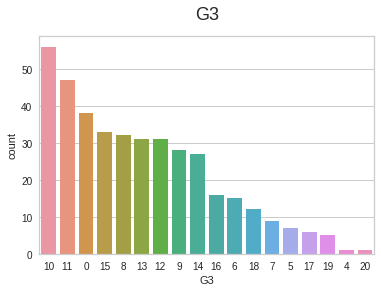

In [423]:
for c in numerical_cols:
  plt.title(" ".join(c.split("_")),size=18,y=1.05)
  sns.countplot(df[c],order=df[c].value_counts().index)
  plt.show()

# Correlation

In [424]:
df.describe() # We see here on avarage that students did not do that well.

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [425]:
corr = df.corr()
corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [426]:
(df
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.161294,-0.149596,0.109804,0.031557,0.236464,0.031380,0.000302,0.140131,0.097073,0.132799,-0.075150,0.149276,-0.057630,-0.167622,-0.173438
Medu,-0.161294,1.000000,0.631577,-0.147849,0.063498,-0.242373,0.012361,0.028493,0.064954,0.022729,-0.044332,-0.035686,0.097562,0.209662,0.236354,0.225036
Fedu,-0.149596,0.631577,1.000000,-0.154454,0.018429,-0.236616,0.011400,-0.017132,0.047961,0.003994,-0.014486,0.018113,0.003568,0.194737,0.194844,0.170049
traveltime,0.109804,-0.147849,-0.154454,1.000000,-0.105969,0.079917,-0.038656,-0.022279,-0.001430,0.066477,0.063654,-0.015452,-0.025061,-0.085501,-0.123795,-0.120530
studytime,0.031557,0.063498,0.018429,-0.105969,1.000000,-0.157633,0.058141,-0.131321,-0.065979,-0.217904,-0.264021,-0.091497,-0.046180,0.162286,0.129160,0.105170
failures,0.236464,-0.242373,-0.236616,0.079917,-0.157633,1.000000,-0.051389,0.088058,0.105419,0.187492,0.127912,0.079688,0.096028,-0.346052,-0.362357,-0.361224
famrel,0.031380,0.012361,0.011400,-0.038656,0.058141,-0.051389,1.000000,0.143142,0.063549,-0.106338,-0.116060,0.085341,-0.086577,0.026433,0.008165,0.054977
freetime,0.000302,0.028493,-0.017132,-0.022279,-0.131321,0.088058,0.143142,1.000000,0.285182,0.194223,0.130246,0.088975,0.013397,0.006973,-0.016765,-0.004994
goout,0.140131,0.064954,0.047961,-0.001430,-0.065979,0.105419,0.063549,0.285182,1.000000,0.255146,0.393333,-0.018541,0.133280,-0.151636,-0.160985,-0.166119
Dalc,0.097073,0.022729,0.003994,0.066477,-0.217904,0.187492,-0.106338,0.194223,0.255146,1.000000,0.639906,0.095139,0.129651,-0.111438,-0.110086,-0.120944


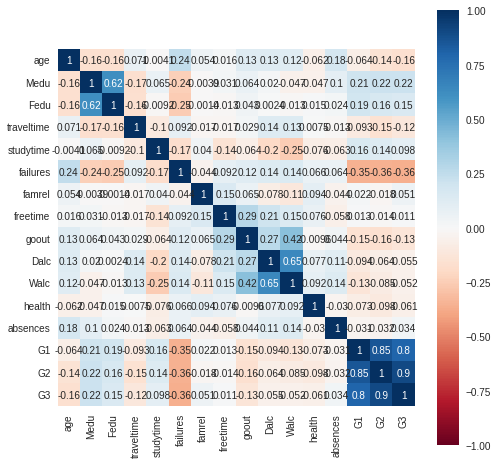

In [427]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, ax=ax)

In [428]:
corr_target = df.corrwith(df["G3"])
corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)[1:].head(5)
# Here we see that for our target: the features that have highest corr.

G2          0.904868
G1          0.801468
failures   -0.360415
Medu        0.217147
age        -0.161579
dtype: float64

Text(0.5, 1.0, 'Second period grade & final grade')

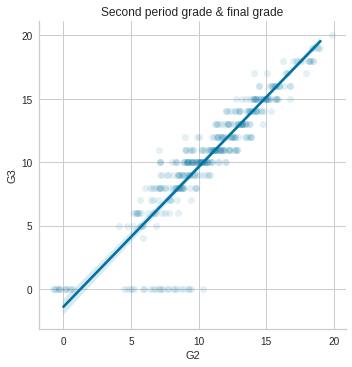

In [429]:
sns.lmplot(x='G2', y='G3', data=df, x_jitter=1, scatter_kws={'alpha':.1})
plt.title('Second period grade & final grade')

Text(0.5, 1.0, 'First period grade & final grade')

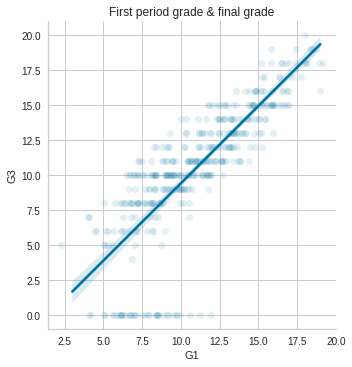

In [430]:
sns.lmplot(x='G1', y='G3', data=df, x_jitter=1, scatter_kws={'alpha':.1})
plt.title('First period grade & final grade')

Text(0.5, 1.0, 'Number of past classes failures & finial grade')

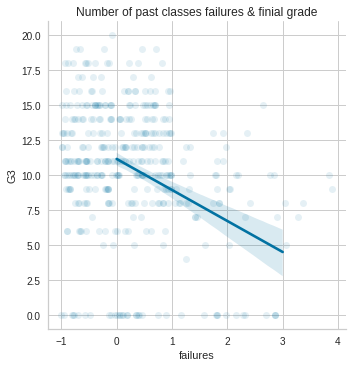

In [431]:
sns.lmplot(x='failures', y='G3', data=df, x_jitter=1, scatter_kws={'alpha':.1})
plt.title('Number of past classes failures & finial grade')

Text(0.5, 1.0, "Mother's education & finial exam")

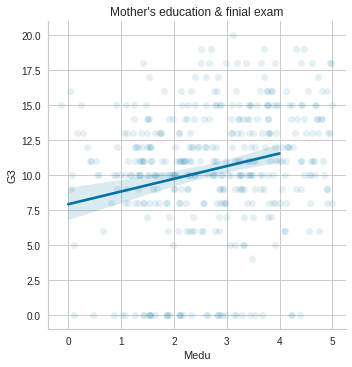

In [432]:
sns.lmplot(x='Medu', y='G3', data=df, x_jitter=1, scatter_kws={'alpha':.1})
plt.title("Mother's education & finial exam")

Text(0.5, 1.0, 'Age & finial exam')

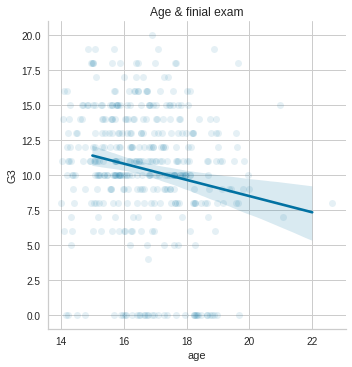

In [433]:
sns.lmplot(x='age', y='G3', data=df, x_jitter=1, scatter_kws={'alpha':.1})
plt.title("Age & finial exam")

Text(0.5, 1.0, "Mother's education & finial exam wtih mother's education")

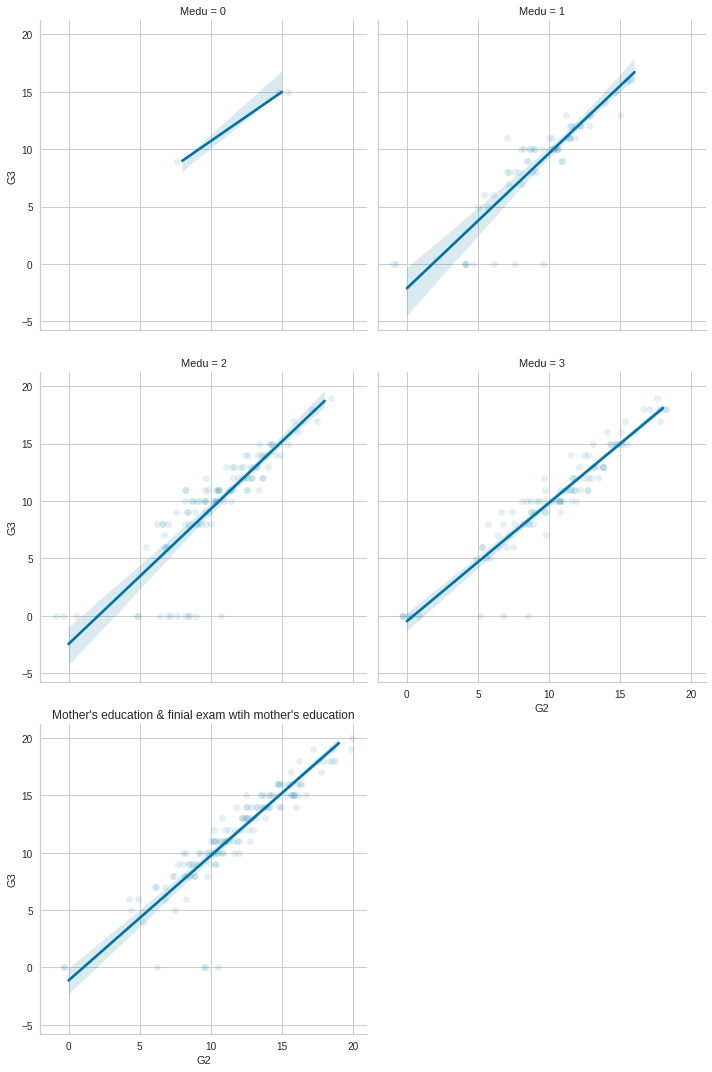

In [434]:
sns.lmplot(x='G2', y='G3', data=df, x_jitter=1, scatter_kws={'alpha':.1},
          col='Medu', col_wrap=2)
plt.title("Mother's education & finial exam wtih mother's education")

Text(0.5, 1.0, 'Age & Finial Exam with sex of student')

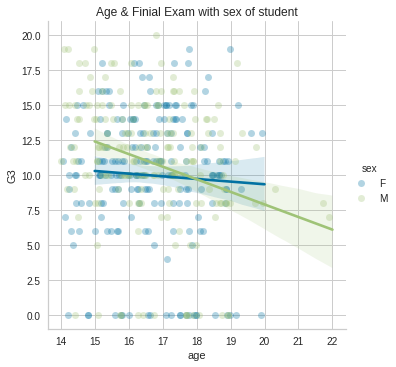

In [435]:
sns.lmplot(x='age', y='G3', data=df, x_jitter=1, scatter_kws={'alpha':.3},
           hue='sex')

plt.title("Age & Finial Exam with sex of student")

# Part 3

To include in your presentation:

Intro and background about your data set

Explanation of the cleaning steps required and a brief explanation of how you addressed them in your data set.

If there were null values, explain how you addressed them.

At least two exploratory visuals you used to understand your data set and what you learned from each.

If relevant, any unique challenges you encountered while working with this data set and how you handled them.  

Commit your slide deck and video to your GitHub repository. 

Large files can be saved on Google Drive and the link can be added to GitHub. 

Ensure that the share settings allow anyone with the link to view the file.

# Part 4

# Data Preprocessing

In [436]:
y = df['G3']

In [437]:
raw_features = df.drop('G3', axis=1)

# 1-hot encoding of categorical column "source"
X = pd.get_dummies(raw_features)

X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [438]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [439]:
# source: stackoverflow
def evaluate_models(model,X,y):

  y_preds = model.predict(X)

  r2 = model.score(X,y)
  rmse = np.sqrt(mean_squared_error(y,y_preds))

  print(f"R2 score: {'{:.2%}'.format(r2)} and RMSE: {'{:.2f}'.format(rmse)}")

# Basemodel

In [440]:
DummyR = DummyRegressor(strategy="mean")
DummyR.fit(X_train,y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [441]:
evaluate_models(DummyR,X_train,y_train)

R2 score: 0.00% and RMSE: 4.50


In [442]:
evaluate_models(DummyR,X_test,y_test)

R2 score: -0.06% and RMSE: 4.80


# Linear Regression

In [443]:
model = LinearRegression()

In [444]:

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [445]:
evaluate_models(model,X_train,y_train)

R2 score: 86.22% and RMSE: 1.67


In [446]:
evaluate_models(model,X_test,y_test)

R2 score: 78.11% and RMSE: 2.25


In [448]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) # we see that absences, G1, G2, are important features given p-values are below: 0.05

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     47.21
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          7.20e-119
Time:                        05:09:46   Log-Likelihood:                -791.99
No. Observations:                 395   AIC:                             1668.
Df Residuals:                     353   BIC:                             1835.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.1733      0.10

# Different models: that best fit line

In [449]:
def train_eval_plot(model):
  model.fit(X, y)
  y_pred = model.predict(X)

  plt.figure()
  plt.scatter(y, y_pred)
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")

  m = y.min()
  M = y.max()

  plt.plot((m, M), (m, M), color='red')
  plt.title(model.__class__.__name__);

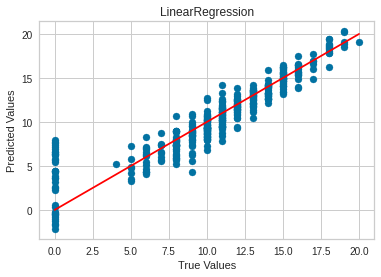

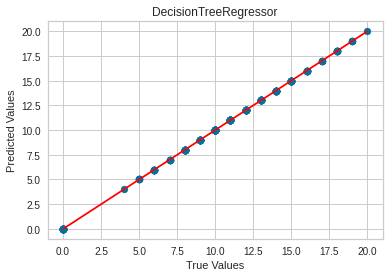

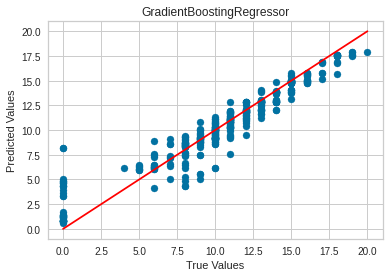

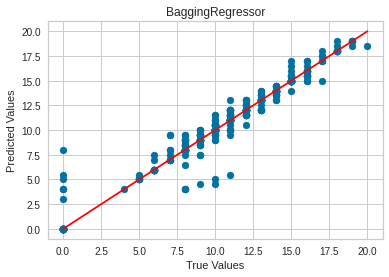

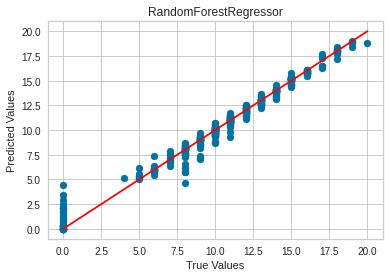

In [450]:
models = [LinearRegression(),
          DecisionTreeRegressor(),
          GradientBoostingRegressor(random_state=0, n_estimators=25),
          BaggingRegressor(random_state=0, n_estimators=2),
          RandomForestRegressor(random_state=0, n_estimators=25),]

for model in models:
  train_eval_plot(model)

# Decision Tree Regressor

In [451]:
dt_model = DecisionTreeRegressor()
dt_model = dt_model.fit(X_train, y_train)
print(dt_model)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


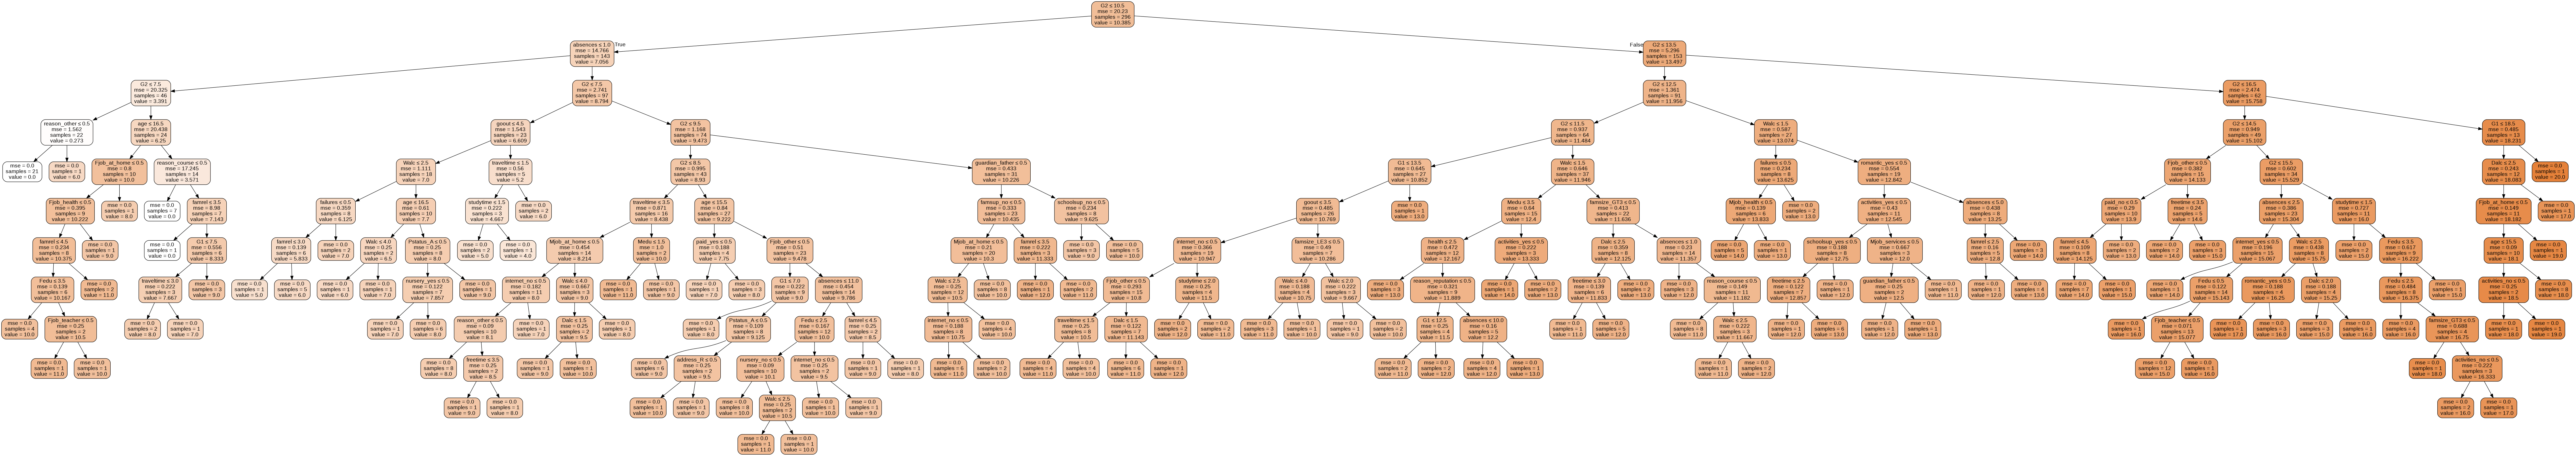

In [452]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# We can see the "questions" our tree is asking: G1 & Absences

In [453]:
#  3) Optimize the max_depth based on the R2 score.

# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

print(r2)

[0.7475952362903611, 0.8256517406747831, 0.8134903674798425, 0.7891578537822661, 0.7660826863367721, 0.751256257463561, 0.7834503638934156, 0.7351175407672481, 0.7435051418549652, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041, 0.7404359726122041]


Text(0, 0.5, 'R2')

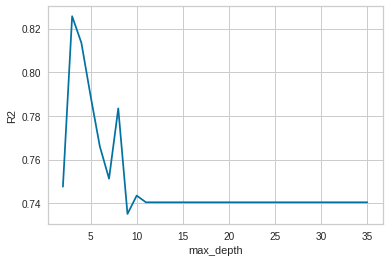

In [454]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')

In [455]:
# What is the r2 of your final model on the training set and on the test set?

# Let's run the model with our optimized value for max_depth, which is 7

dec_tree_2 = DecisionTreeRegressor(max_depth = 2)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)

print(train_2_score)
print(test_2_score)

0.7531722435882627
0.7475952362903611


In [456]:
evaluate_models(dec_tree_2,X_train,y_train)

R2 score: 75.32% and RMSE: 2.23


In [457]:
evaluate_models(dec_tree_2,X_test,y_test)

R2 score: 74.76% and RMSE: 2.41


In [458]:
params = {
          "max_depth":[2,5,10,50,75,100],
          "max_leaf_nodes":[10,25,30,40,50],
          "max_features":[2,5,10,20,30,50,60,70,100],
          "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],}

In [459]:
grid = GridSearchCV(dt_model,params)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
           

In [460]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 50,
 'max_features': 50,
 'max_leaf_nodes': 30}

In [461]:
grid.best_score_

0.8450265147129556

In [462]:
evaluate_models(grid,X_train,y_train) # after hypertuning

R2 score: 97.89% and RMSE: 0.65


In [463]:
evaluate_models(grid,X_test,y_test) # after hypertuning

R2 score: 80.49% and RMSE: 2.12


# Bagged Tree Model

In [464]:
# Bagged trees regressor
bt = BaggingRegressor()
bt.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [465]:

# training R2

print(bt.score(X_train, y_train))

# testing R2

bt_test_score = bt.score(X_test, y_test)

print(bt_test_score)

0.9781215881061295
0.8640358025456832


In [466]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, bt.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, bt.predict(X_test))))

Training RMSE: 0.6652829107615431
Testing RMSE: 1.7698370637782543


In [467]:
evaluate_models(bt,X_train,y_train)

R2 score: 97.81% and RMSE: 0.67


In [468]:
evaluate_models(bt,X_test,y_test)

R2 score: 86.40% and RMSE: 1.77


In [469]:
bt.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [470]:
params = {
          "n_estimators":[60,70,100],
}
grid = GridSearchCV(bt,params)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [60, 70, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [471]:
grid.best_params_

{'n_estimators': 70}

In [472]:
grid.best_score_

0.8902584425546161

In [473]:
evaluate_models(grid,X_train,y_train) # after hypertuning

R2 score: 98.00% and RMSE: 0.64


In [474]:
evaluate_models(grid,X_test,y_test) # after hypertuning

R2 score: 85.59% and RMSE: 1.82


# Random Forest Model

In [475]:
rf_model = RandomForestRegressor()  

print(rf_model)

rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [476]:
# training R2
print(rf_model.score(X_train, y_train))

# testing R2

rf_model_test = rf_model.score(X_test, y_test)

print(rf_model_test)

0.9837013930795113
0.8631407012586694


In [477]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))))

Training RMSE: 0.5742139162556247
Testing RMSE: 1.775653244427088


In [478]:
evaluate_models(rf_model,X_train,y_train) # train

R2 score: 98.37% and RMSE: 0.57


In [479]:
evaluate_models(rf_model,X_test,y_test) # test

R2 score: 86.31% and RMSE: 1.78


In [480]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [481]:

params = { 
    'max_depth': [70],
    
 'min_samples_leaf': [20],
 'min_samples_split': [10],
 'n_estimators': [400]}
    


grid = GridSearchCV(rf_model,params)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [482]:
grid.best_params_

{'max_depth': 70,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 400}

In [483]:
grid.best_score_

0.8217236620369027

In [484]:
evaluate_models(grid,X_train,y_train) # after hypertunning

R2 score: 84.91% and RMSE: 1.75


In [485]:
evaluate_models(grid,X_test,y_test) # after hypertunning

R2 score: 85.86% and RMSE: 1.80


# Feature Importance

In [486]:

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',    
                                                                        ascending=False)
feature_importances

,importance
G2,0.766293
absences,0.122012
reason_home,0.014175
age,0.013526
famrel,0.006539
G1,0.005989
schoolsup_no,0.005677
health,0.005574
goout,0.004522
schoolsup_yes,0.003758


# Model Evaluation


Comparing themodels: R^2 & RMSE:

Baseline Model: -0.06%, and RMSE: 4.80



* Linear Regression: 78.11%, RMSE: 2.25
* Decision tree score: 80.49%, RMSE: 2.12
* Bagged tree score: 85.59%, RMSE: 1.82
* Random forest score: 85.86%, RMSE:1.80

In this case: Random Forest did the best with an R^2 score of 85.86% and a root mean square error of 1.80

